<a href="https://colab.research.google.com/github/tigerjk726/Bumjoong/blob/main/features%20importance%20and%20shap.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import re
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import chi2_contingency
from sklearn.inspection import permutation_importance
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import accuracy_score
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV
from matplotlib import pyplot as plt

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [4]:
%cd /content/drive/My Drive/Colab Notebooks/

/content/drive/My Drive/Colab Notebooks


In [5]:
import pandas as pd
df = pd.read_csv('landslide.csv')

In [8]:
df.columns

Index(['occ.', 'intensity', 'rock type', 'soil depth', 'friction angle',
       'viscosity', 'moisture content', 'weight', 'porosity', 'void ratio',
       'saturation degree', 'dryness', 'moistness', 'saturation',
       'permeability coefficient', 'USCS', 'slope', 'altitude',
       'saturation moisture content'],
      dtype='object')

In [17]:
target_name = df.columns[0]
feature_cols = df.columns[1:]

In [18]:
dfdata = df.values
x = dfdata[:,1:] 
y = dfdata[:,:1]

In [19]:
import pandas as pd
from sklearn.tree import DecisionTreeClassifier # Import Decision Tree Classifier
from sklearn.model_selection import train_test_split # Import train_test_split function
from sklearn import metrics #Import scikit-learn metrics module for accuracy calculation
# Split dataset into training set and test set
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=1) # 70% training and 30% test

In [20]:
rf = RandomForestRegressor(n_estimators=100)
rf.fit(x_train, y_train)
rf.feature_importances_

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  


array([0.04692216, 0.        , 0.16922448, 0.01925343, 0.01695855,
       0.05078864, 0.03953741, 0.01518324, 0.00422059, 0.13386232,
       0.02184102, 0.00736026, 0.05953368, 0.08221345, 0.01915614,
       0.28912205, 0.00956783, 0.01525474])

1. feature importance(변수 중요도)

 -ensemble learning 모델들은 중요 변수(feature)를 추출할 수 있는 알고리즘이 내장됨   => 변수의 중요도만 알 수 있고, 얼마나 어떻게 영향을 미치는지(양수/음수, 크기) 알 수 없음

Text(0.5, 0, 'Random Forest Feature Importance')

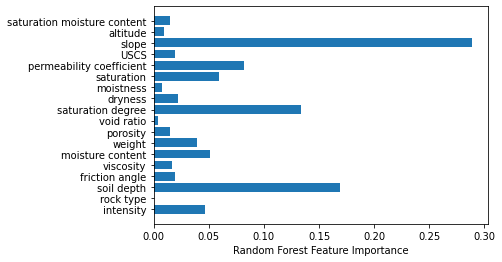

In [21]:
plt.barh(feature_cols, rf.feature_importances_)
plt.xlabel("Random Forest Feature Importance")

Text(0.5, 0, 'Random Forest Feature Importance')

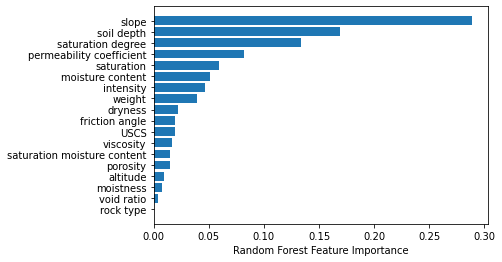

In [26]:
sorted_idx = rf.feature_importances_.argsort()
plt.barh(feature_cols[sorted_idx], rf.feature_importances_[sorted_idx])
plt.xlabel("Random Forest Feature Importance")

Permutation Based Feature Importance for overcome deawbacks of default(impurity decrease)

In [22]:
perm_importance = permutation_importance(rf, x_test, y_test)

Text(0.5, 0, 'Permutation Importance')

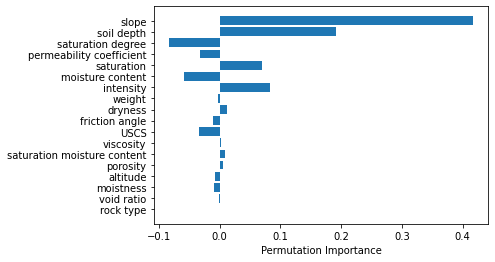

In [28]:
plt.barh(feature_cols[sorted_idx], perm_importance.importances_mean[sorted_idx])
plt.xlabel("Permutation Importance")

In [30]:
!pip install shap

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 569 kB 4.1 MB/s 


Feature Importance Computed with SHAP Values
(Shapley values from game theory to estimate the how does each feature contribute to the prediction)

shap value: inconsistency한 문제를 해결하기 위한 지표

1. 정의
-(연합 게임 이론)goal을 성취하기 위해 player들이 협업하여, 전체 payout에 대해 각 player들의 기여도에 따라 payout을 배당
   => goal=prediction, player=feature, payout=feature attribution

-특정 관측치의 j번째 feature로 인한 실제 예측치와 평균 예측치의 평균적인 차이
-목적: 실제 예측값과 평균 예측값의 차이를 변수별 효과로 설명하는 것
-A변수의 기여도를 알아볼 때(예시)
   1) A, B, C 변수를 고정(연합)으로 하고, 나머지 변수를 무작위(랜덤)로 뽑아 예측값1 계산
   2) B, C만 고정으로 하고, A를 포함한 나머지 변수를 무작위로 뽑아 예측값2 계산
   3) A 변수의 marginal contribution = 예측값1 - 예측값2
      => 샘플링된 변수들에 따라 이 값이 달라짐
   4) 이 과정을 반복하여 weighted average를 구한 값이 shap value


2. 특징
-consistency함(feature importance의 단점 보완)
   => 모델이 바뀌어도 shap value값이 달라지지 않음(일치성이 있음)
-특정 관측치 별로 feature가 어떻게 영향을 미치는지 개별적으로 볼 수 있음
-다양한 변수들의 조합을 시각화하여 영향력을 파악하기 쉬움


3. 활용(해석)
-feature contribution이 양수이면 평균 예측치에 비해 긍정적인 효과
-feature contribution이 음수이면 평균 예측치에 비해 부정적인 효과
-'feature contribution이 양수인 변수의 값을 높이면 Y가 증가한다'고 해석X(회귀분석도 마찬가지)
   => 예측을 하는 것이지 인과관계를 보는 것이 아님
-'feature contribution이 양수인 변수의 값이 높을수록 Y가 평균치보다 클 확률이 높아진다(경향이 높다)'고 해석

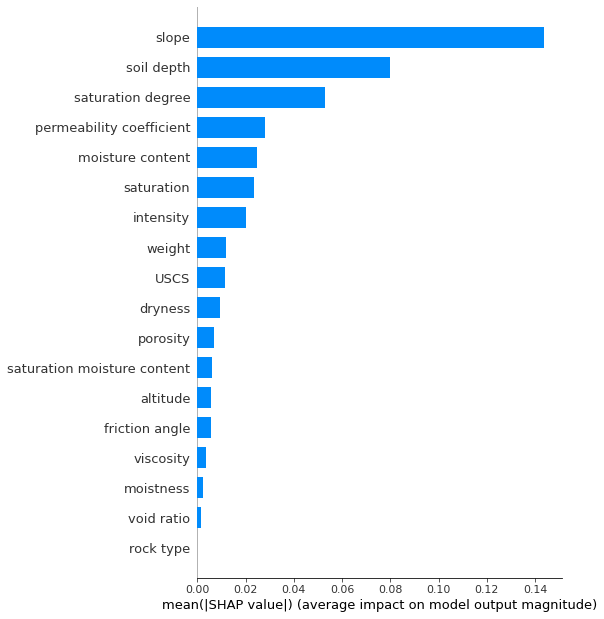

In [34]:
import shap
explainer = shap.TreeExplainer(rf)
shap_values = explainer.shap_values(x_test)
shap.summary_plot(shap_values, x_test, feature_cols, plot_type="bar")

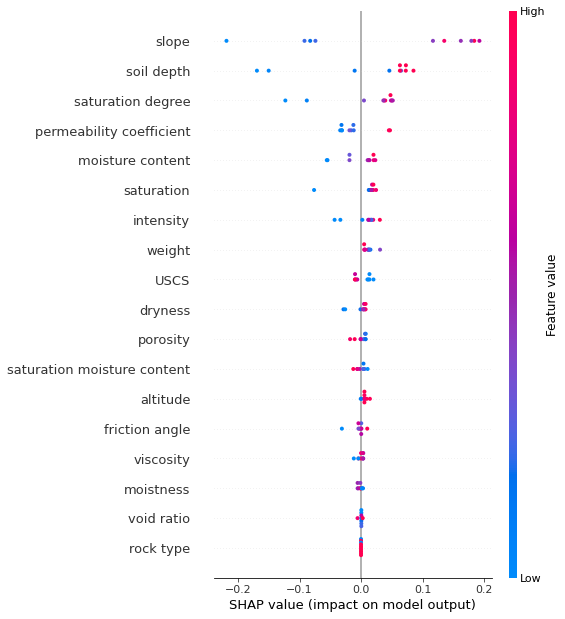

In [36]:
shap.summary_plot(shap_values, x_test, feature_cols)